In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv(r'ready_for_nn.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
sc = StandardScaler()
y_sc = StandardScaler()
x = sc.fit_transform(x)
y = y_sc.fit_transform(y.reshape(-1, 1))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [8]:
x_data = torch.Tensor(x_train).type(torch.FloatTensor)
y_data = torch.Tensor(y_train).type(torch.FloatTensor)

In [9]:
class Regression(torch.nn.Module):
    def __init__(self, input_dims, output_dims):
        super(Regression, self).__init__()
        self.linear = torch.nn.Linear(input_dims, output_dims)
        self.activate = torch.nn.ReLU()
        
    def forward(self, x):
        return self.activate(self.linear(x))

In [10]:
input_dims = x.shape[1]
output_dims = y.shape[1]
model = Regression(input_dims, output_dims)

In [11]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
for i in range(200_000):
    pred = model(x_data)
    loss = criterion(pred, y_data)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i%20000 == 0:
        print("Epoch {}, loss: {}".format(str(i), loss.item()))

Epoch 0, loss: 1.0598070621490479
Epoch 20000, loss: 0.36171576380729675
Epoch 40000, loss: 0.3616071343421936
Epoch 60000, loss: 0.3615589141845703
Epoch 80000, loss: 0.36154118180274963
Epoch 100000, loss: 0.36154115200042725
Epoch 120000, loss: 0.36154115200042725
Epoch 140000, loss: 0.36154115200042725
Epoch 160000, loss: 0.36154115200042725
Epoch 180000, loss: 0.36154115200042725


In [13]:
p_x = torch.Tensor(x_test).type(torch.FloatTensor)
hat = y_sc.inverse_transform(model(p_x).detach().numpy())

In [14]:
test = y_sc.inverse_transform(y_test)

In [15]:
r2_score(hat, test)

0.3768217146403975

In [16]:
mean_absolute_error(hat, test)

6397.876897650653

In [17]:
mean_squared_error(hat, test)

56707278.9620244

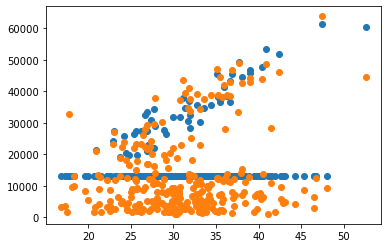

In [18]:
plt.scatter(sc.inverse_transform(x_test)[:, 2], hat)
plt.scatter(sc.inverse_transform(x_test)[:, 2], test)

In [19]:
y_sc.inverse_transform(model(torch.Tensor([sc.transform(np.array([20, 1, 21, 0, 0, 2]).reshape(1, -1))]).type(torch.FloatTensor)).detach().numpy()[0][0].reshape(1, -1))

C:\Users\Azamat.Ilyasov\AppData\Local\Temp\ipykernel_2292\3621237655.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  y_sc.inverse_transform(model(torch.Tensor([sc.transform(np.array([20, 1, 21, 0, 0, 2]).reshape(1, -1))]).type(torch.FloatTensor)).detach().numpy()[0][0].reshape(1, -1))


array([[13270.422]], dtype=float32)